# House Price Prediction 

Use data available on https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview to create advanced regression model that predicts house prices based on features and location

## Exploratory Data Analysis

Obtain statistics of feature distribution, and explore correlations of variables with sale price

In [26]:
#Import relevant modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

#Create train and test dataframes from the csv files 
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
index = df_test['Id']

#Display the head of each in HTML format 
display(HTML(df_test.head().to_html()))
display(HTML(df_train.head().to_html()))

#Display all the variables and their types
variables = df_train.columns
print(variables)
for var in variables:
    print(type(df_train[var].iloc[0]))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [27]:
# Identify each variable type as either categorical or numerical and store
numerical_vars = []
categorical_vars = []

for var in variables:
    i = 0
    try:
        while np.isnan(df_train[var].iloc[i]):
            i += 1
    except TypeError as te:
        print(f"Error at {var}: {te}")
    if type(df_train[var].iloc[i]) in [np.int64, np.float64, float]:
        numerical_vars.append(var)
    elif type(df_train[var].iloc[i]) == str:
        categorical_vars.append(var)

# Some categorical features have numerical values - swap these from numerical into categorical
numtocat = ["MSSubClass"]
for var in variables:
    if var in numtocat:
        numerical_vars.remove(var)
        categorical_vars.append(var)

# Remove Id and MoSold as a numerical variable
df_train.drop("Id", axis=1, inplace=True)
df_test.drop("Id", axis=1, inplace=True)
numerical_vars.remove("Id")
df_train.drop("MoSold", axis=1, inplace=True)
df_test.drop("MoSold", axis=1, inplace=True)
numerical_vars.remove("MoSold")

# Print numerical and categorical vars
print("Numerical vars are: ", numerical_vars)
print("Categorical vars are: ", categorical_vars)

Error at MSZoning: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error at Street: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error at Alley: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error at LotShape: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error at LandContour: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Error at Utilities: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types ac

### Descriptive Statistics

In [28]:
# Store the mean, std dev and range of each numerical variable in a dictionary
stats_dict = dict()
for var in numerical_vars:
    try:
        stats_dict[var] = []
        stats_dict[var].append(np.mean(df_train[var]))
        stats_dict[var].append(np.std(df_train[var]))
        stats_dict[var].append(np.max(df_train[var] - np.min(df_train[var])))
    except TypeError as te:
        print(f"error at iteration {var}: {te}")
print(stats_dict)

{'LotFrontage': [70.04995836802665, 24.27463944767602, 292.0], 'LotArea': [10516.828082191782, 9977.846105448101, 213945], 'OverallQual': [6.0993150684931505, 1.3825228366585944, 9], 'OverallCond': [5.575342465753424, 1.1124181757710145, 8], 'YearBuilt': [1971.267808219178, 30.192558810489455, 138], 'YearRemodAdd': [1984.8657534246574, 20.638335251821964, 60], 'MasVnrArea': [103.68526170798899, 181.00384522611688, 1600.0], 'BsmtFinSF1': [443.6397260273973, 455.94186610921673, 5644], 'BsmtFinSF2': [46.54931506849315, 161.26401701700848, 1474], 'BsmtUnfSF': [567.2404109589041, 441.71560507210376, 2336], 'TotalBsmtSF': [1057.4294520547944, 438.5550571748912, 6110], '1stFlrSF': [1162.626712328767, 386.4553223022891, 4358], '2ndFlrSF': [346.99246575342465, 436.37891423916466, 2065], 'LowQualFinSF': [5.844520547945206, 48.60642684099989, 572], 'GrLivArea': [1515.463698630137, 525.3003935623229, 5308], 'BsmtFullBath': [0.42534246575342466, 0.5187328665380566, 3], 'BsmtHalfBath': [0.0575342465

### Data Visualization

Visualize the distribution of numerical features with bar charts and categorical features with pie charts - refer to Part1_figs, part2_figs and part3_figs folder for the results of categorical, numerical feature distributions and correlation exploration respectively 

In [29]:
# Pie charts for categorical variables
for var in categorical_vars:
    lst = df_train[var].tolist()
    countsdict = dict()
    print(var)
    for element in lst:
        countsdict[element] = countsdict.get(element, 0) + 1
    labels = countsdict.keys()
    sizes = countsdict.values()
    total = sum(sizes)
    percentages = [(size / total) * 100 for size in sizes]
    legend_labels = [
        f"{label} - {percentage:.1f}%" for label, percentage in zip(labels, percentages)
    ]
    plt.figure()
    plt.style.use("fivethirtyeight")
    plt.title(f"Distribution of {var}")
    plt.pie(
        sizes,
        startangle=90,
        textprops={"fontsize": 10},
        wedgeprops={"edgecolor": "black", "linewidth": 0.5, "antialiased": True},
    )
    plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(f"Part1_figs/dist_of_{var}", dpi=200)

In [30]:
# Distribution of Numerical Variables

for var in numerical_vars:
    lst = df_train[var].tolist()
    lst = np.array(lst)
    text = f"Mean: {round(stats_dict[var][0], 1)} \nStdDev: {round(stats_dict[var][1], 1)} \nRange: {stats_dict[var][2]} \n"
    plt.figure()
    plt.hist(lst, bins=20, edgecolor="black")
    plt.title(f"Distribution of {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Counts")
    plt.text(
        1.05,
        0.60,
        text,
        ha="left",
        va="bottom",
        transform=plt.gca().transAxes,
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
    )
    plt.tight_layout()
    plt.savefig(f"Part2_figs/dist_of_ {var}", facecolor="w")

<ipython-input-31-e3e4234e4757>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(facecolor='white')


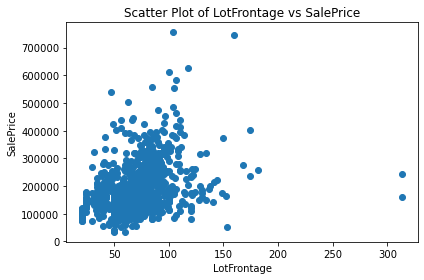

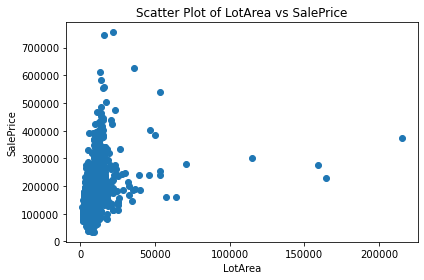

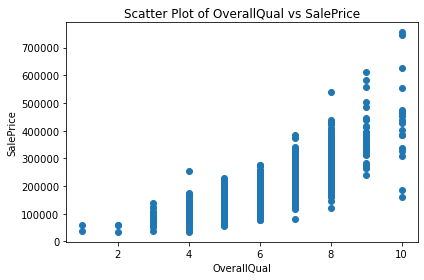

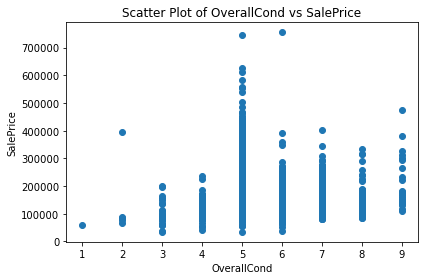

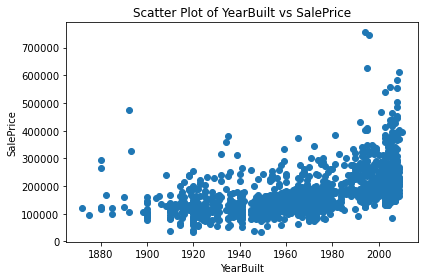

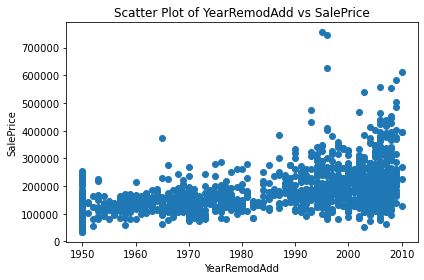

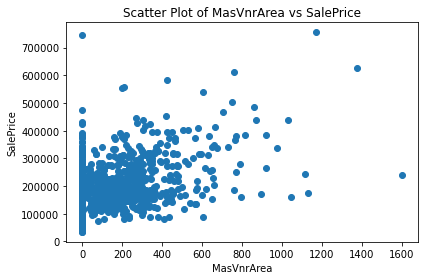

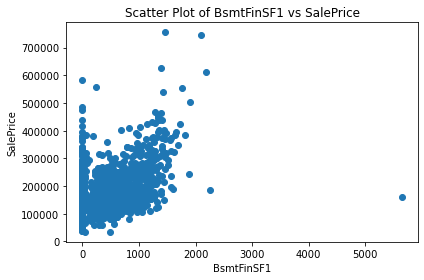

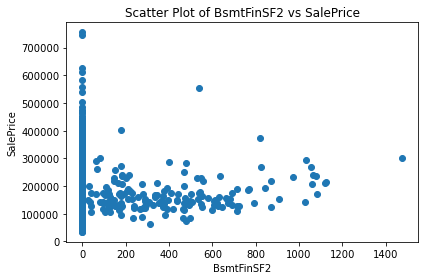

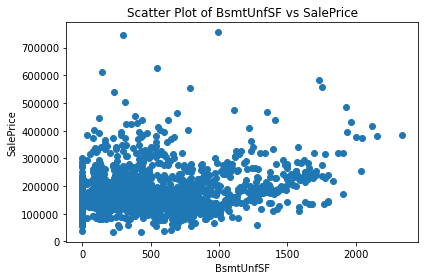

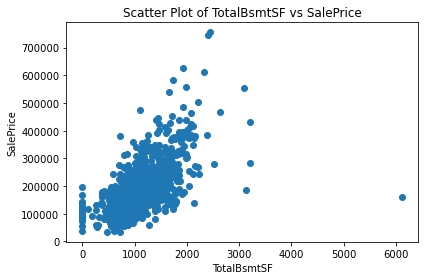

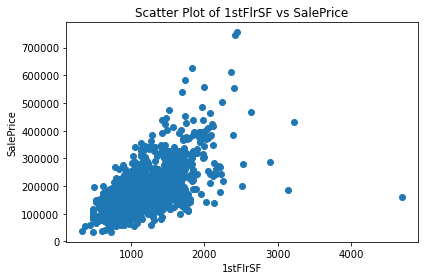

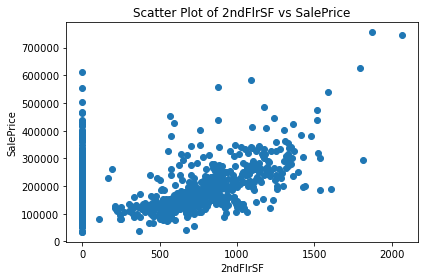

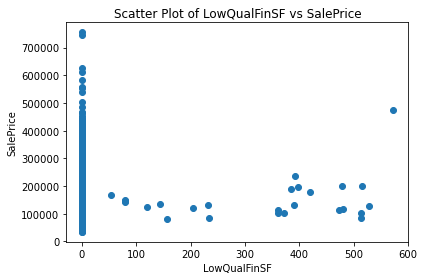

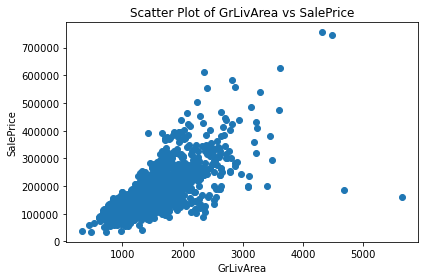

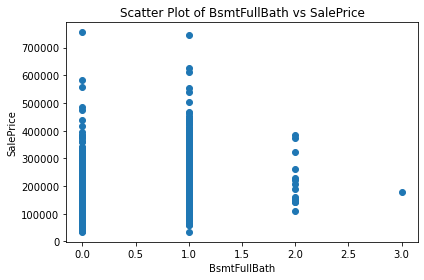

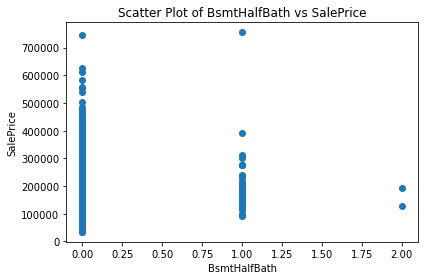

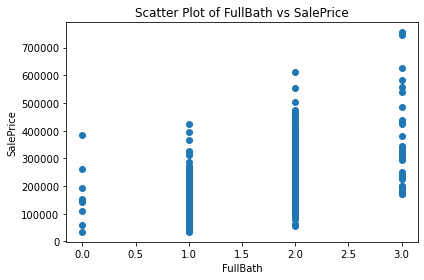

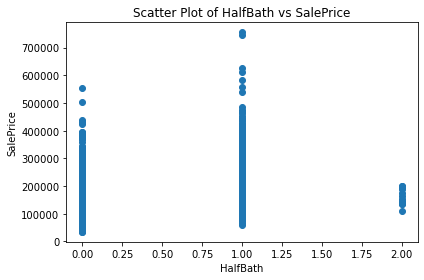

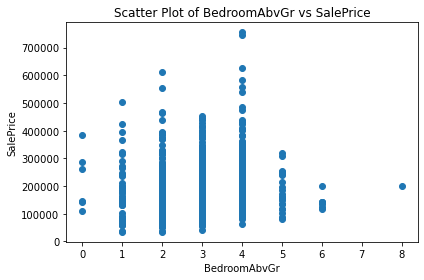

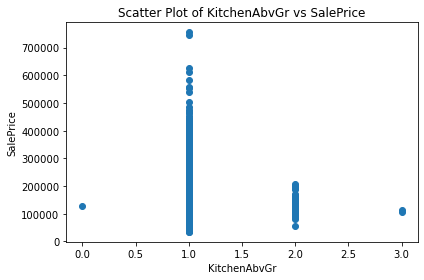

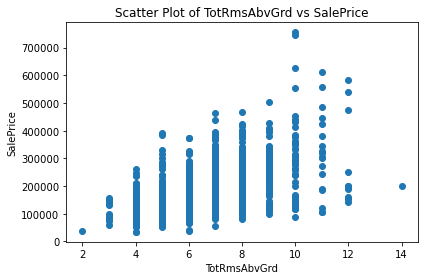

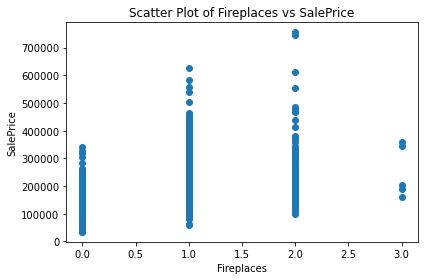

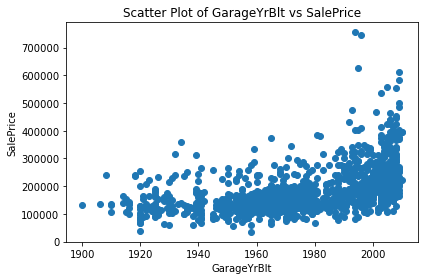

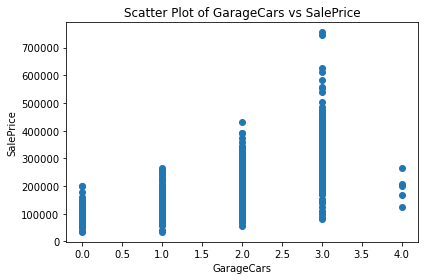

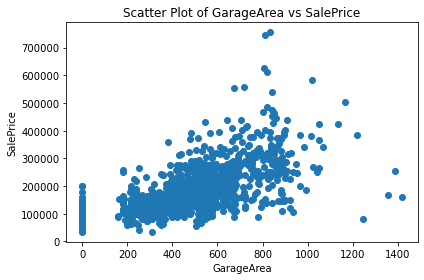

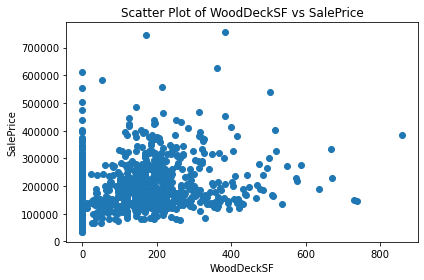

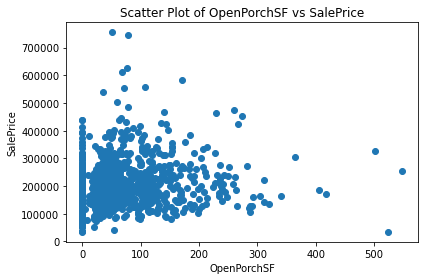

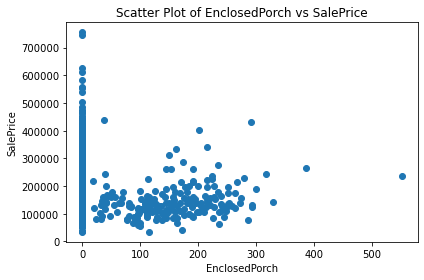

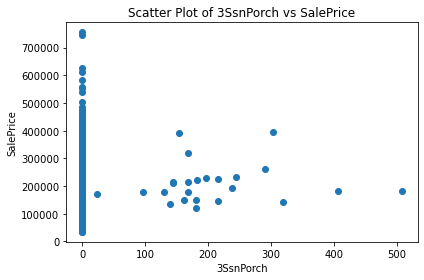

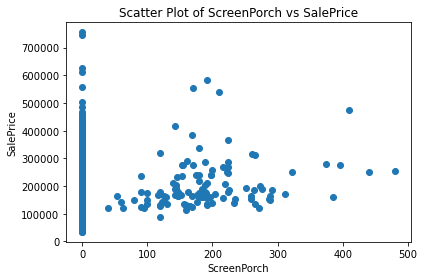

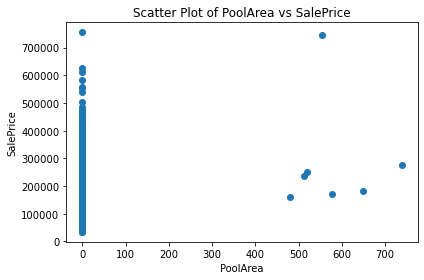

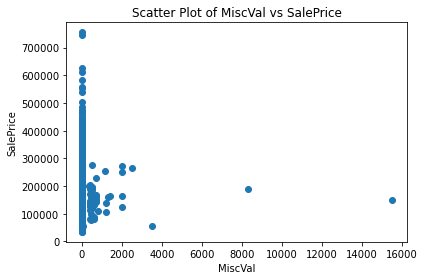

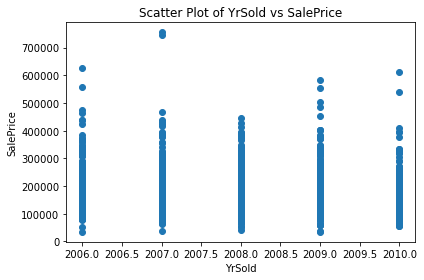

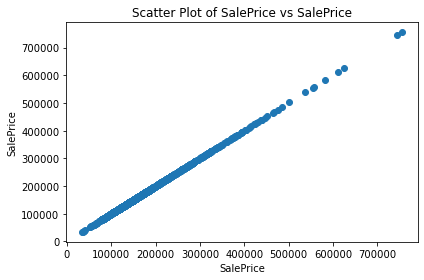

In [31]:
# Scatter plots for correlation of various numerical features with saleprice

for var in numerical_vars:
    plt.figure(facecolor="white")
    plt.scatter(x=df_train[var], y=df_train["SalePrice"])
    plt.xlabel(f"{var}")
    plt.ylabel(f"SalePrice")
    plt.title(f"Scatter Plot of {var} vs SalePrice")
    plt.tight_layout()
    plt.savefig(fname=f"Part3_figs/{var} vs SalePrice")

## Data Cleaning

In [32]:
# Remove SalePrice from training set and numerical_vars
numerical_vars.remove("SalePrice")
y_train = df_train["SalePrice"].tolist()
df_train.drop("SalePrice", axis=1, inplace=True)

## Data Preprocessing

Encode categorical variables and normalize numerical variables. Add relevant engineered features.

In [33]:
# Convert all dates into numerical features - years from today
date_vars = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]

for var in date_vars:
    lst = df_train[var].tolist()
    df_train[var].replace(
        dict(zip(df_train[var], [2020 - value for value in lst])), inplace=True
    )
    lst = df_test[var].tolist()
    df_test[var].replace(
        dict(zip(df_test[var], [2020 - value for value in lst])), inplace=True
    )

# Check the updated DataFrame
print(df_train[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]])
print(df_test[["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]])

      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0            17            17         17.0      12
1            44            44         44.0      13
2            19            18         19.0      12
3           105            50         22.0      14
4            20            20         20.0      12
...         ...           ...          ...     ...
1455         21            20         21.0      13
1456         42            32         42.0      10
1457         79            14         79.0      10
1458         70            24         70.0      10
1459         55            55         55.0      12

[1460 rows x 4 columns]
      YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0            59            59         59.0      10
1            62            62         62.0      10
2            23            22         23.0      10
3            22            22         22.0      10
4            28            28         28.0      10
...         ...           ...          ...     ...
1454  

In [34]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical variables

for var in numerical_vars:
    trainlist = df_train[var].tolist()
    testlist = df_test[var].tolist()
    scaler = MinMaxScaler()
    trainlist_normalized = scaler.fit_transform(np.array(trainlist).reshape(-1, 1))
    testlist_normalized = scaler.fit_transform(np.array(testlist).reshape(-1, 1))
    df_train[var].replace(dict(zip(df_train[var], trainlist_normalized)), inplace=True)
    df_test[var].replace(dict(zip(df_test[var], testlist_normalized)), inplace=True)

print(df_train.head())
print(df_test.head())

   MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          60       RL     0.150685  0.033420   Pave   NaN      Reg   
1          20       RL     0.202055  0.038795   Pave   NaN      Reg   
2          60       RL     0.160959  0.046507   Pave   NaN      IR1   
3          70       RL     0.133562  0.038561   Pave   NaN      IR1   
4          60       RL     0.215753  0.060576   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... 3SsnPorch ScreenPorch PoolArea PoolQC  \
0         Lvl    AllPub    Inside  ...       0.0         0.0      0.0    NaN   
1         Lvl    AllPub       FR2  ...       0.0         0.0      0.0    NaN   
2         Lvl    AllPub    Inside  ...       0.0         0.0      0.0    NaN   
3         Lvl    AllPub    Corner  ...       0.0         0.0      0.0    NaN   
4         Lvl    AllPub       FR2  ...       0.0         0.0      0.0    NaN   

  Fence MiscFeature  MiscVal  YrSold  SaleType  SaleCondition  
0   NaN         NaN      0.0

In [35]:
print(categorical_vars)
print("Street" in df_train.columns.tolist())
print(df_train.head())
print(df_test.head())

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass']
True
   MSSubClass MSZoning  LotFrontage   LotArea Street Alley LotShape  \
0          60       RL     0.150685  0.033420   Pave   NaN      Reg   
1          20       RL     0.202055  0.038795   Pave   NaN      Reg   
2          60       RL     0.160959  0.046507   Pave   NaN      IR1   
3          70       RL     0.133562  0.038561   Pave   NaN      IR1   
4          60       RL     0.215753  0.060576 

In [36]:
# One-hot encoding for categorical variables
df_train = pd.get_dummies(df_train, columns=categorical_vars)
df_test = pd.get_dummies(df_test, columns=categorical_vars)

In [37]:
print(df_train.head())

   LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.150685  0.033420     0.666667        0.500   0.050725      0.116667   
1     0.202055  0.038795     0.555556        0.875   0.246377      0.566667   
2     0.160959  0.046507     0.666667        0.500   0.065217      0.133333   
3     0.133562  0.038561     0.666667        0.500   0.688406      0.666667   
4     0.215753  0.060576     0.777778        0.500   0.072464      0.166667   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  MSSubClass_60  \
0     0.12250    0.125089         0.0   0.064212  ...              1   
1     0.00000    0.173281         0.0   0.121575  ...              0   
2     0.10125    0.086109         0.0   0.185788  ...              1   
3     0.00000    0.038271         0.0   0.231164  ...              0   
4     0.21875    0.116052         0.0   0.209760  ...              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0           

In [38]:
# Ensure consistency in one-hot encoding - fill columns in test set with zero that are not present in train set and vice versa
lst1 = df_train.columns.tolist()
lst2 = df_test.columns.tolist()

setA = set(lst1)
setB = set(lst2)
setunion = setA.union(setB)
BnotA = list(setunion - setA)
AnotB = list(setunion - setB)

for element in BnotA:
    df_train[element] = 0
for element in AnotB:
    df_test[element] = 0

print(BnotA)
print(AnotB)
print(df_train.head())
print(df_test.head())

['MSSubClass_150']
['PoolQC_Fa', 'Utilities_NoSeWa', 'Exterior2nd_Other', 'RoofMatl_ClyTile', 'RoofMatl_Roll', 'Condition2_RRAn', 'RoofMatl_Membran', 'Electrical_Mix', 'Condition2_RRNn', 'Heating_Floor', 'GarageQual_Ex', 'Heating_OthW', 'Exterior1st_ImStucc', 'HouseStyle_2.5Fin', 'Exterior1st_Stone', 'MiscFeature_TenC', 'RoofMatl_Metal', 'Condition2_RRAe']
   LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.150685  0.033420     0.666667        0.500   0.050725      0.116667   
1     0.202055  0.038795     0.555556        0.875   0.246377      0.566667   
2     0.160959  0.046507     0.666667        0.500   0.065217      0.133333   
3     0.133562  0.038561     0.666667        0.500   0.688406      0.666667   
4     0.215753  0.060576     0.777778        0.500   0.072464      0.166667   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  MSSubClass_70  \
0     0.12250    0.125089         0.0   0.064212  ...              0   
1     0.00000    0.173

In [39]:
# Ensure that the columns are in the same order for when the dataframes are converted into arrays
df_test = df_test[df_train.columns]

In [40]:
# Check for the presence of null values
print(df_test.isnull().sum().sum())
print(df_train.isnull().sum().sum())

330
348


In [41]:
# Fill all null values with 0
df_train.fillna(value=0, inplace=True)
df_test.fillna(value=0, inplace=True)

In [42]:
print(df_train.columns.to_list())
print(df_test.columns.to_list())

print(set(df_train.columns.to_list()) == set(df_test.columns.to_list()))

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborho

## Machine Learning Model

In [43]:
# Obtain x_train, y_train, x_test arrays
x_train = df_train.to_numpy()
y_train = np.array(y_train)
x_test = df_test.to_numpy()

print(type(x_train), type(y_train), type(x_test))
print(np.shape(x_train), np.shape(y_train), np.shape(x_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1460, 302) (1460,) (1459, 302)


In [44]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


model = LinearRegression()
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train)
model.fit(X_train, Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)

train_mse = mean_squared_error(Y_train, Y_pred_train)
val_mse = mean_squared_error(Y_val, Y_pred_val)

print(train_mse)
print(val_mse)

355471573.72602737
2.8396180596507566e+27


In [45]:
# xgb regressor - ensemble method
import xgboost as xgb

model_xgb = xgb.XGBRegressor(n_estimators=700, max_depth=3, learning_rate=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train)
model_xgb.fit(X_train, Y_train)
Y_pred_val = model_xgb.predict(X_val)
Y_pred_train = model_xgb.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_pred_train)
val_mse = mean_squared_error(Y_val, Y_pred_val)

print(train_mse)
print(val_mse)

model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_test)

3790742.673825603
651627121.4410993


In [46]:
# Kernel ridge regression
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(alpha=0.5, kernel="rbf", gamma=0.1, degree=3)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train)
krr.fit(X_train, Y_train)
Y_pred_val = krr.predict(X_val)
Y_pred_train = krr.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_pred_train)
val_mse = mean_squared_error(Y_val, Y_pred_val)

krr.fit(x_train, y_train)
y_pred = krr.predict(x_test)

print(train_mse)
print(val_mse)

352129131.77347064
1522425581.474208


In [47]:
# Lasso regression
from sklearn.linear_model import Lasso

lrr = Lasso(alpha=0.25, max_iter=10000)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train)
lrr.fit(X_train, Y_train)
Y_pred_val = lrr.predict(X_val)
Y_pred_train = lrr.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_pred_train)
val_mse = mean_squared_error(Y_val, Y_pred_val)

lrr.fit(x_train, y_train)
y_pred = lrr.predict(x_test)

print(train_mse)
print(val_mse)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.957e+10, tolerance: 6.710e+08
  model = cd_fast.enet_coordinate_descent(


389241624.701539
3551747224.363956


In [48]:
# Random forest ensemble with no depth limit
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
)
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train)
rfr.fit(X_train, Y_train)
Y_pred_val = rfr.predict(X_val)
Y_pred_train = rfr.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_pred_train)
val_mse = mean_squared_error(Y_val, Y_pred_val)

rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

print(train_mse)
print(val_mse)

123110615.55855161
913763242.1239773


In [53]:
# Implement grid search for optimal hyperparameters on xgb and randomforestregressor ensemble models
from sklearn.model_selection import GridSearchCV

# RandomForest parameters

rf_param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

xgb_param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0],
}

rf_grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
)
rf_grid_search.fit(x_train, y_train)

xgb_grid_search = GridSearchCV(
    xgb.XGBRegressor(random_state=42),
    xgb_param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
)
xgb_grid_search.fit(x_train, y_train)


print("RandomForestRegressor - Best Parameters:", rf_grid_search.best_params_)
print("RandomForestRegressor - Best Score:", rf_grid_search.best_score_)
print("XGBRegressor - Best Parameters:", xgb_grid_search.best_params_)
print("XGBRegressor - Best Score:", xgb_grid_search.best_score_)

RandomForestRegressor - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor - Best Score: -882715457.220755
XGBRegressor - Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
XGBRegressor - Best Score: -668534503.3255004


In [55]:
print(rf_grid_search.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Try rfr model with these parameters
best_rfr_params = rf_grid_search.best_params_ 
best_xgb_params = xgb_grid_search.best_params_

rfr = RandomForestRegressor(**best_rfr_params)
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)

In [59]:
# Try xgb model with these parameters
xgb = xgb.XGBRegressor(**best_xgb_params)
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

In [60]:
submission = pd.DataFrame({"Id": index, "SalePrice": y_pred})
submission.to_csv("submission.csv", index=False)